In [56]:
import pandas as pd

# 페르마의 정리
   > n이 2보다 큰 자연수인 경우에 a<sup>n</sup> + b<sup>n</sup> = c<sup>n</sup> 이 되는 자연수 a, b, c 는 존재하지 않는다  
   > n이 3이고 a, b, c가 1부터 10까지 자연수 일 때 페르마의 마지막 정리가 사실임을 증명하시오  
- (for문을 이용하여 증명하시오)

In [57]:
## a가 1부터 10까지 반복
for a in range(1, 11, 1):
    ## b가 1부터 10까지 반복
    for b in range(1, 11, 1):
        ## c가 1부터 10까지 반복
        for c in range(1, 11, 1):
            ## 페르마의 마지막 정리 수식이 참인지
            if a**3 + b**3 == c**3:
                print(a, b, c)

print('프로그램 종료')


프로그램 종료


# max() 함수 만들기
1. max() 함수는 개수가 가변인 인자의 값들을 비교하여 가장 큰 수를 돌려주는 함수이다. 
2. 이 함수와 같은 행동를 하는 함수를 생성
    - 개수가 가변인 매개변수 생성
    - for문과 if문을 이용하여 함수를 생성

In [58]:
## max(1, 6, 2, 8, -1)

## 매개변수의 개수가 가변일 때
def custom_max(*_list):
    print(_list)
    print(type(_list))
    ## 초기값 설정
    result = _list[0]
    ## 반복문 실행
    for i in _list:
        ## 초기값과 인자의 값을 비교
        if result < i:
            ## 인자의 값이 더 크면 result 변수의 값은 인자값을 변경
            result = i
    return result

custom_max(1, 2, 3)
    

(1, 2, 3)
<class 'tuple'>


3

# 카드 이용 내역

- test_csv 폴더의 유통+업종 데이터를 로드하여 문제를 푸시오

1. 각 컬럼의 이름을 변경 ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
2. 기준년월을 시계열로 변경
3. index를 기준년월 변경
4. 데이터를 확인하여서 굉장히 이상한 데이터가 존재 체크
5. 성별 컬럼의 데이터 값을 1은 남자, 2는 여자 변경
6. 남, 녀 성별을 기준으로 연도별 건당 이용 금액의 평균이 몇인지 출력 & 시각화

In [59]:
df = pd.read_csv("./test_csv/유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109.csv",
                 encoding='euc-kr')

In [60]:
df.head(1)

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7600.0


In [61]:
## 컬럼의 이름을 변경
df.columns = ['기준년월', 
              '업종', 
              '성별', 
              '연령대', 
              '총이용건수', 
              '총이용금액']
df.head(1)

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7600.0


In [62]:
## 시계열로 데이터 변환
df['기준년월'] = pd.to_datetime(df['기준년월'], format = '%Y%m')


In [63]:
## 기준년월 컬럼을
df.set_index('기준년월', inplace = True)

In [64]:
df.head(2)

,업종,성별,연령대,총이용건수,총이용금액
기준년월,,,,,
2019-01-01,백화점,1,1,1,7600.0
2019-01-01,백화점,1,10,379,19458720.0


In [65]:
df[['총이용건수', '총이용금액']] < 0

,총이용건수,총이용금액
기준년월,,
2019-01-01,False,False
2019-01-01,False,False
2019-01-01,False,False
2019-01-01,False,False
2019-01-01,False,False
...,...,...
2021-09-01,False,False
2021-09-01,False,False
2021-09-01,False,False


In [66]:
(df[['총이용건수', '총이용금액']] < 0).any(0)

C:\Users\intco\AppData\Local\Temp\ipykernel_57252\3802458590.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  (df[['총이용건수', '총이용금액']] < 0).any(0)


총이용건수    False
총이용금액    False
dtype: bool

In [67]:
df['성별'].value_counts()

2    1336
1    1312
Name: 성별, dtype: int64

In [68]:
df['연령대'].value_counts()

10    264
20    264
30    264
40    264
50    264
60    264
70    264
80    264
90    264
0     233
1      39
Name: 연령대, dtype: int64

In [72]:
## 연령대가 0인 데이터를 제외
df2 = df[~(df['연령대'] == 0)]

In [74]:
df2['성별'] = df2['성별'].apply(lambda x : '남자' if x == 1 else '여자')

C:\Users\intco\AppData\Local\Temp\ipykernel_57252\2470964075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['성별'] = df2['성별'].apply(lambda x : '남자' if x == 1 else '여자')


In [75]:
## 연도별 남, 녀 건당 이용 평균 금액을 출력 및 시각화
## 연도 컬럼을 생성
df2['연도'] = df2.index.strftime("%Y")

C:\Users\intco\AppData\Local\Temp\ipykernel_57252\4102416873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['연도'] = df2.index.strftime("%Y")


In [78]:
## 건당 평균 금액 컬럼 생성 
df2['건당이용금액'] = df2['총이용금액'] / df2['총이용건수']

C:\Users\intco\AppData\Local\Temp\ipykernel_57252\1316957605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['건당이용금액'] = df2['총이용금액'] / df2['총이용건수']


In [81]:
pivot = pd.pivot_table(df2, 
                       index = '연도', 
                       columns = '성별', 
                       aggfunc = 'mean',
                       values = '건당이용금액')

pivot

성별,남자,여자
연도,,
2019,39670.894902,37936.085012
2020,45283.490754,42269.743826
2021,48623.260587,44866.351576


<AxesSubplot: xlabel='연도'>

C:\Users\intco\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\intco\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
C:\Users\intco\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\intco\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\intco\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
C:\Users\intco\AppData\Roaming\Python\Pyt

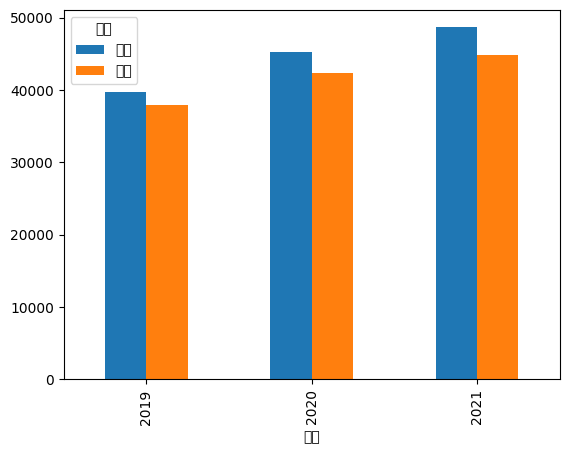

In [83]:
pivot.plot.bar()

In [84]:
## 한글 깨짐 방지
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Darwin': #MAC인 경우
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

<AxesSubplot: xlabel='연도'>

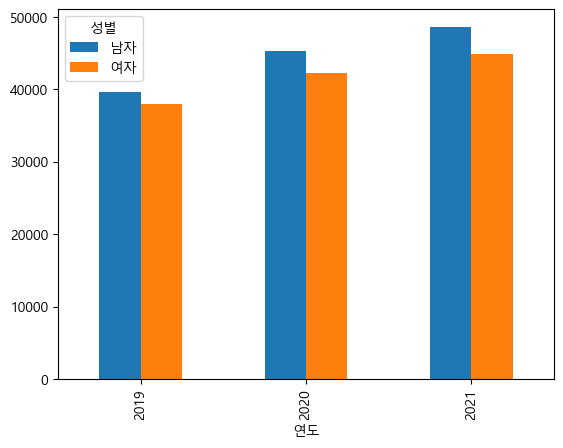

In [85]:
pivot.plot.bar()

In [86]:
df.head()

,업종,성별,연령대,총이용건수,총이용금액
기준년월,,,,,
2019-01-01,백화점,1,1,1,7.600000e+03
2019-01-01,백화점,1,10,379,1.945872e+07
2019-01-01,백화점,1,20,45173,4.747711e+09
2019-01-01,백화점,1,30,271858,2.791826e+10
2019-01-01,백화점,1,40,391109,3.791149e+10


In [89]:
## 인덱스를 기준으로 그룹화 총이용금액의 합계
group_df = df.groupby(df.index).sum()['총이용금액']
group_df

C:\Users\intco\AppData\Local\Temp\ipykernel_57252\3491170992.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = df.groupby(df.index).sum()['총이용금액']


기준년월
2019-01-01    8.717640e+11
2019-02-01    7.755979e+11
2019-03-01    9.027603e+11
2019-04-01    8.850403e+11
2019-05-01    9.427953e+11
2019-06-01    8.651183e+11
2019-07-01    8.757622e+11
2019-08-01    8.504003e+11
2019-09-01    9.243550e+11
2019-10-01    9.305846e+11
2019-11-01    9.497879e+11
2019-12-01    9.788397e+11
2020-01-01    8.988784e+11
2020-02-01    7.081442e+11
2020-03-01    7.232449e+11
2020-04-01    7.884697e+11
2020-05-01    8.671502e+11
2020-06-01    8.476832e+11
2020-07-01    7.958824e+11
2020-08-01    8.421567e+11
2020-09-01    8.638192e+11
2020-10-01    9.075381e+11
2020-11-01    9.155520e+11
2020-12-01    8.032242e+11
2021-01-01    8.091200e+11
2021-02-01    7.698808e+11
2021-03-01    8.747389e+11
2021-04-01    8.403269e+11
2021-05-01    9.169530e+11
2021-06-01    8.168673e+11
2021-07-01    7.840346e+11
2021-08-01    8.560545e+11
2021-09-01    8.163331e+11
Name: 총이용금액, dtype: float64

## 온라인 카드 매출과 오프라인 카드매출을 월별로 비교
1. 오프라인 데이터 df를 월별로 그룹화 총이용금액의 합계
    - 기준년월을 시계열데이터 변경
    - 기준년월 인덱스로 변경
    - 인덱스를 기준으로 그룹화 -> 총이용금액의 합계
2. 온라인 데이터 df_online도 월별로 그룹화 총이용금액의 합계
    - 기준년월을 시계열데이터 변경
    - 기준년월 인덱스로 변경
    - 인덱스를 기준으로 그룹화 -> 총이용금액의 합계
3. 1,2번과정에서 나온 데이터를 plot 그래프를 그려서 차이를 확인
4. 2개의 데이터프레임을 단순한 행 결합
    - df_online에 업종 파생 변수 생성 값은 "온라인"
    - df와 df_online 데이터프레임을 행 결합
    - 월별, 업종별로 총 이용 금액을 pivot_table을 이용하여 그래프 시각화

In [92]:
df_online = pd.read_csv('./test_csv/온라인+카드소비트렌드+데이터_1901_2109.csv',
                        encoding='euc-kr')

In [95]:
df_online.head(1)

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,1,1,1,110685


In [98]:
## 컬럼의 이름을 변경
df_online.columns = ['기준년월', 
                     '성별', 
                     '연령대', 
                     '총이용건수', 
                     '총이용금액']
df_online.head(1)

,기준년월,성별,연령대,총이용건수,총이용금액
0,201901,1,1,1,110685


In [99]:
## 시계열로 데이터 변환
df_online['기준년월'] = pd.to_datetime(df_online['기준년월'], format = '%Y%m')


In [100]:
## 기준년월 컬럼을
df_online.set_index('기준년월', inplace = True)

In [101]:
group_df_online = df_online.groupby(df_online.index).sum()['총이용금액']
group_df_online

기준년월
2019-01-01     778281658966
2019-02-01     669627559900
2019-03-01     769982635445
2019-04-01     769343707461
2019-05-01     785876486705
2019-06-01     736634786418
2019-07-01     789419422650
2019-08-01     773942892864
2019-09-01     789228722869
2019-10-01     845586167863
2019-11-01     882579790957
2019-12-01     910066757909
2020-01-01     899703509382
2020-02-01     912763625832
2020-03-01     965611011227
2020-04-01     931307970792
2020-05-01     950802396484
2020-06-01     995605134056
2020-07-01    1017431624983
2020-08-01    1009749120540
2020-09-01    1060918790262
2020-10-01    1031688353884
2020-11-01    1069901508390
2020-12-01    1161292914339
2021-01-01    1148184458420
2021-02-01    1061306176199
2021-03-01    1196784931389
2021-04-01    1185710549372
2021-05-01    1205281302978
2021-06-01    1193365244882
2021-07-01    1217713253921
2021-08-01    1254467251455
2021-09-01    1195275255905
Name: 총이용금액, dtype: int64

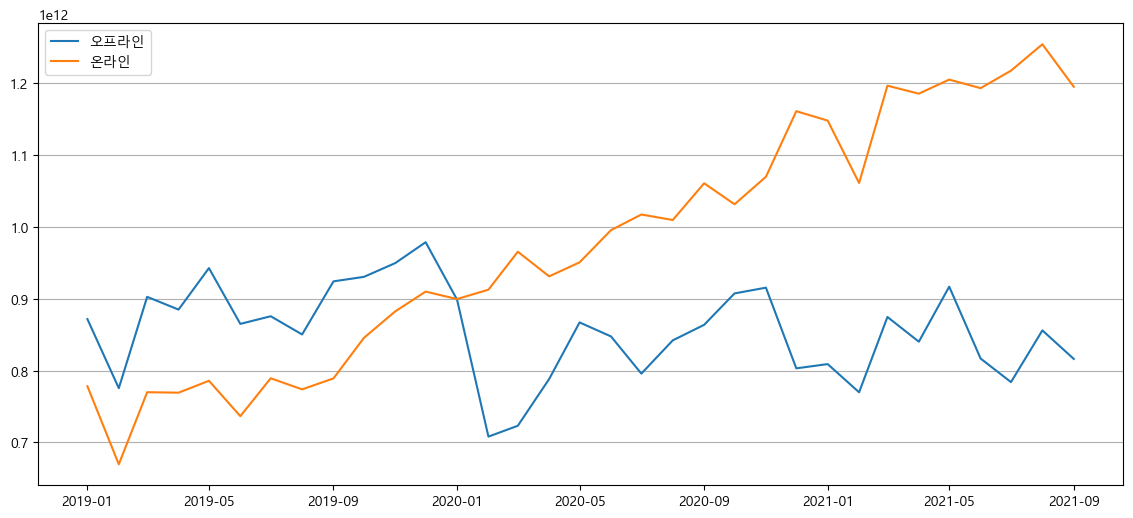

In [105]:
## 두개의 그룹화 데이터를 시각화
plt.figure(figsize = (14, 6))
plt.grid(True, axis = 'y')
plt.plot(group_df, label = '오프라인')
plt.plot(group_df_online, label = '온라인')
plt.legend()
plt.show()

In [103]:
## 두개의 데이터프레임 결합
## onlone 데이터에는 업종 컬럼이 존재하지 않는다
df_online['업종'] = '온라인'

In [104]:
## 데이터프레임의 단순한 행 결합
total_df = pd.concat([df, df_online], axis = 0)

In [112]:
pivot_table = pd.pivot_table(total_df,
                             index = total_df.index,
                             columns = '업종',
                             aggfunc = 'sum',
                             values = '총이용금액')

pivot_table

업종,백화점,슈퍼마켓,온라인,편의점,할인점
기준년월,,,,,
2019-01-01,455895539087.000000,173613089088.000000,778281658966.000000,44083584621.000000,198171780041.000000
2019-02-01,401191621441.000000,154639049561.000000,669627559900.000000,40196820908.000000,179570386603.000000
2019-03-01,488652119604.000000,171793017241.000000,769982635445.000000,46346861161.000000,195968338413.000000
2019-04-01,453672286027.000000,174178319781.000000,769343707461.000000,50935845149.000000,206253864397.000000
2019-05-01,489003572924.000000,184689508776.000000,785876486705.000000,55691270613.000000,213410907627.000000
2019-06-01,432509893802.000000,187423849425.000000,736634786418.000000,55593119763.000000,189591408279.000000
2019-07-01,411344032847.000000,191281681184.000000,789419422650.000000,61483146955.000000,211653341788.000000
2019-08-01,393982708640.000000,198311508288.000000,773942892864.000000,61406245686.000000,196699817054.000000
2019-09-01,455074741069.000000,190870551327.000000,789228722869.000000,60421294611.000000,217988445163.000000


<AxesSubplot: xlabel='기준년월'>

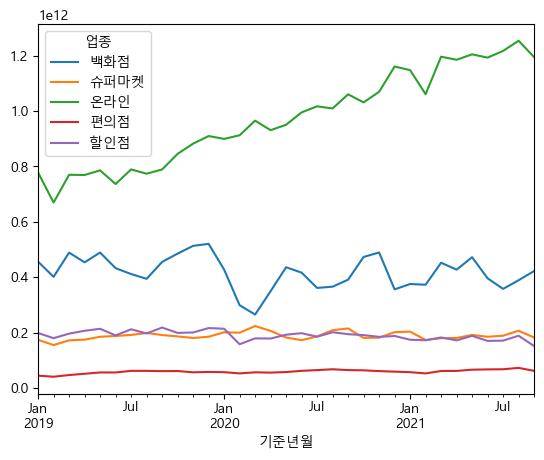

In [ ]:
pivot_table.plot()

In [111]:
## 지수 표현 없이 출력 세팅
pd.options.display.float_format = '{:2f}'.format